<img src="support_files/images/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 20-21, 2022</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Custom Modules</h1></center>

<p>We have seen that new functinoality in Python can be encapsulated as a <i>module</i>, and that we can import modules into our own code. In this section we will create a new Python module. 

- Important because encapsulating functions makes them <i>reusable</i>. We will use this mechanism to develop tools that we can share with each other during the course. We'll discuss more on how to share code during the main course.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Let's begin by making a simple module. For now, it will contain just one function we can use to downsample time-series data.
</div>

In [2]:
# here is the code we'd like to include in the module:

import numpy as np

def downsample(data, n, axis=0):
    """Reduce the number of samples in an array by averaging together
    n samples at a time.
    """
    if n <= 1:
        return data
    new_len = data.shape[axis] // n
    s = list(data.shape)
    s[axis] = new_len
    s.insert(axis+1, n)
    sl = [slice(None)] * data.ndim
    sl[axis] = slice(0, new_len*n)
    d1 = data[tuple(sl)]
    d1.shape = tuple(s)
    d2 = d1.mean(axis+1)
    return d2

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Just so we understand what this function does, let's generate a noisy time-series signal and plot it:
</div>

(-20.0, 20.0)

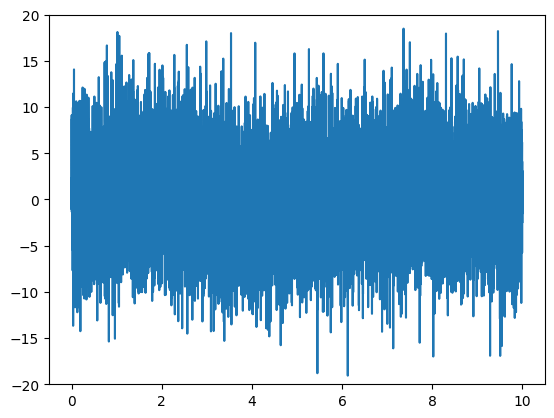

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 10, 10000)
data = np.sin(t) + 5 * np.random.normal(size=len(t))
plt.plot(t, data)
plt.ylim(-20, 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
And this is what the same signal looks like after it has been downsampled. Note that the downsampled signal has many fewer samples, and the overall noise is much smaller.
</div>

(-20.0, 20.0)

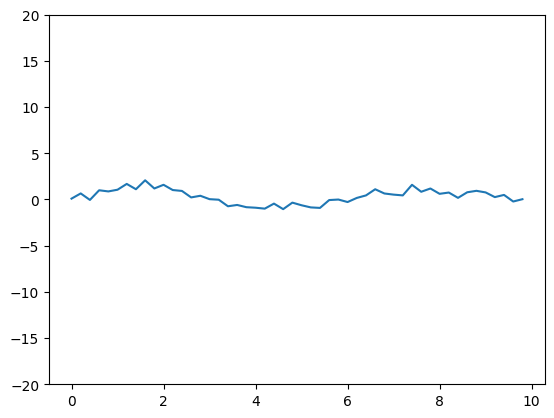

In [4]:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data)
plt.ylim(-20, 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Just to reiterate: We have created a useful function, and now we would like to encapsulate it into a module so that

<ul>
<li>We can re-use this function in many different places without copying it, and
<li>We can share this function with other people.
</ul>

<br>
<hr>

Here's how to turn this code into a module:
<ol>
<li>Open a code editor and paste in the definition of `downsample()` given above, including the `import numpy` statement.
<li>Save the file as `my_module.py` in the same location as this notebook.
</ol>
<br>
You're done!<br>

Now let's see if it works:

</div>

In [5]:
# Remove the old downsample (so you can't cheat!)
if 'downsample' in locals():
    del downsample # to have the local function deleted

# Import the new definition of `downsample` from your module
from my_module import downsample

# If you get "ImportError: No module named my_module", then make sure
# the .py file was saved in the same folder as this notebook file.

(-20.0, 20.0)

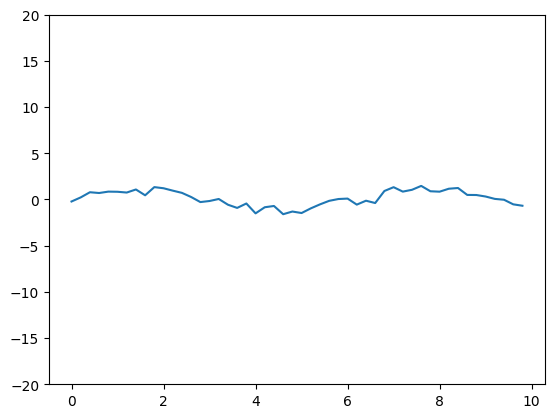

In [6]:
# test again:
import numpy as np
t = np.linspace(0, 10, 10000)
data = np.sin(t) + 5 * np.random.normal(size=len(t))

ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data)
plt.ylim(-20, 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Good so far, but there are some issues with this approach:

<ul>
<li>As our code becomes more complex, we will often want to organize it into multiple files and make them all appear as a single importable module.
<li>If we distribute this code, we will at least want to include a README to explain what it's about, so I'd really like my module to live inside its own folder.
</ul>

<hr>
So now we are going to turn this module into a <i>package</i>, which is really just a collection of modules inside a folder, along with some Python glue.
<ol>
<li>Make a new folder, in the same location as this notebook, called `my_package`
<li>Move `my_module.py` into this new folder
<li>Create an empty text file called `__init__.py` inside `my_package`. (note the double underscores)
</ol>
<br>
The `__init__.py` file is a hint to Python that tells it "this folder is a package that can be imported".

<hr>
Now let's try importing from the new package:

</div>

In [8]:
# Remove the old downsample (so you can't cheat!)
if 'downsample' in locals():
    del downsample

# Import downsample from our shiny new package
from my_package.my_module import downsample 
# the new package should be in the same location as the jupyter notebook

(-20.0, 20.0)

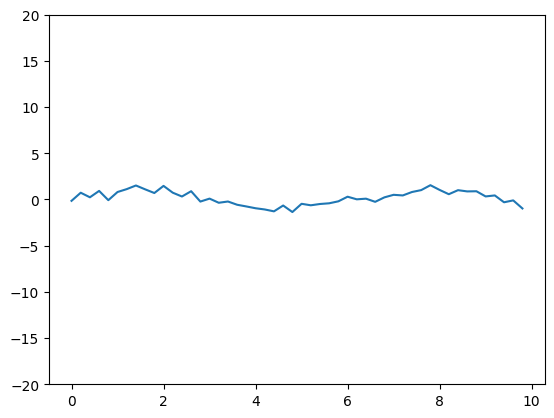

In [9]:
# test again:
from my_package.my_module import np 
t = np.linspace(0, 10, 10000)
data = np.sin(t) + 5 * np.random.normal(size=len(t))

ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data)
plt.ylim(-20, 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>A note about namespaces</h3>

<p>Each python <i>file</i> that you work with has its own isolated namespace. That means we could write `x=1` inside the module, and `x=2` inside this notebook, and the two names will <i>not</i> collide; each `x` variable lives in a different namespace. `import` statements are how we create a reference from one module's namespace into another.

</div>

In [11]:
import my_package.my_module

# my_package contains a namespace with the variable "my_module"
dir(my_package)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'my_module']

In [12]:
# my_module contains its own namespace where the "downsample" function is defined and numpy has been imported
dir(my_package.my_module)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'downsample',
 'np']

In [13]:
# The notebook we are working in contains its own namespace, which includes the name "my_package",
# amongst others.
dir()

['In',
 'Out',
 '_',
 '_11',
 '_12',
 '_3',
 '_4',
 '_6',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'data',
 'downsample',
 'ds_data',
 'exit',
 'get_ipython',
 'my_package',
 'np',
 'plt',
 'quit',
 't']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Remember to write useful help messages in the function docstring. Other users can easily access it using python's help method.
</div>

In [14]:
help(my_package.my_module.downsample)

Help on function downsample in module my_package.my_module:

downsample(data, n, axis=0)
    Reduce the number of samples in an array by averaging together
    n samples at a time.



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
You can also access the docstrings on a module level.
</div>

In [15]:
help(my_package.my_module)

Help on module my_package.my_module in my_package:

NAME
    my_package.my_module

FUNCTIONS
    downsample(data, n, axis=0)
        Reduce the number of samples in an array by averaging together
        n samples at a time.

FILE
    /Volumes/Brain2022/swdb_2022/PythonBootcamp/my_package/my_module.py


